In [11]:
import torch
import torchvision
from torchvision import transforms
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from torchvision import transforms as tfs
from torchvision.datasets import MNIST

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [12]:
device

'cuda'

In [13]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

root = './'
train_dataset = torchvision.datasets.CIFAR10(root, train=True, download=True, transform=transform)
val_dataset = torchvision.datasets.CIFAR10(root, train=False, download=True, transform=transform)

batch_size = 128

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, drop_last=True)
valid_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, drop_last=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [14]:
next(iter(train_dataloader))[0].shape

torch.Size([128, 3, 32, 32])

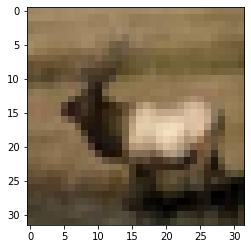

In [15]:
i = np.random.randint(low=0, high=10000)
plt.imshow(valid_dataloader.dataset.data[i], cmap='gray')

In [16]:
# Accuracy: 68% 
# batch size: 128
# 15 epochs

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.bn1 = nn.BatchNorm2d(10)
        self.conv2 = nn.Conv2d(10, 20, 3)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.bn2 = nn.BatchNorm2d(20)
        self.fc1 = nn.Linear(720, 120) 
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, 84)
        self.dropout2 = nn.Dropout(p=0.3)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.bn1(self.pool1(F.relu(self.conv1(x))))
        x = self.bn2(self.pool2(F.relu(self.conv2(x))))
        #print(x.shape)
        x = x.view(-1, 720)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [17]:
# Accuracy: 69,4% 
# batch size: 64
# 15 epochs

class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3)
        self.pool1 = nn.MaxPool2d(2, stride=2)
        self.bn1 = nn.BatchNorm2d(10)

        self.conv2 = nn.Conv2d(10, 20, 3)
        self.pool2 = nn.MaxPool2d(2, stride=2)
        self.bn2 = nn.BatchNorm2d(20)

        self.conv3 = nn.Conv2d(20, 40, 2)
        self.bn3 = nn.BatchNorm2d(40)

        self.conv4 = nn.Conv2d(40, 80, 1)
        self.bn4 = nn.BatchNorm2d(80)

        self.conv5 = nn.Conv2d(80, 120, 1)
        self.pool5 = nn.MaxPool2d(2, stride=1)
        self.bn5 = nn.BatchNorm2d(120)

        self.fc1 = nn.Linear(1920, 120) 
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, 84)
        self.dropout2 = nn.Dropout(p=0.3)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.bn1(self.pool1(F.relu(self.conv1(x))))
        x = self.bn2(self.pool2(F.relu(self.conv2(x))))
        x = self.bn3((F.relu(self.conv3(x))))
        x = self.bn4((F.relu(self.conv4(x))))
        x = self.bn5(self.pool5(F.relu(self.conv5(x))))
        #print(x.shape)
        x = x.view(-1, 1920)
        x = self.dropout1(F.relu(self.fc1(x)))
        x = self.dropout2(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [19]:
model = Net1().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

loaders = {"train": train_dataloader, "valid": valid_dataloader}
max_epochs = 15
accuracy = {"train": [], "valid": []}

In [20]:
for epoch in range(max_epochs):
    for k, dataloader in loaders.items():
        epoch_correct = 0
        epoch_all = 0

        for x_batch, y_batch in dataloader:

            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            if k == "train":
                 model.train()
                 optimizer.zero_grad()
                 outp = model(x_batch)
            else:
                 model.eval()
                 with torch.no_grad():
                    outp = model(x_batch)

            preds = outp.argmax(-1)
            correct = (preds == y_batch).sum()
            all = len(outp)
            epoch_correct += correct.item()
            epoch_all += all

            if k == "train":
                loss = criterion(outp, y_batch)
                loss.backward()
                optimizer.step()

        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.42183493589743587
Loader: valid. Accuracy: 0.5544871794871795
Epoch: 2
Loader: train. Accuracy: 0.5436899038461539
Loader: valid. Accuracy: 0.6094751602564102
Epoch: 3
Loader: train. Accuracy: 0.5963942307692308
Loader: valid. Accuracy: 0.6393229166666666
Epoch: 4
Loader: train. Accuracy: 0.6253405448717949
Loader: valid. Accuracy: 0.6480368589743589
Epoch: 5
Loader: train. Accuracy: 0.6498798076923077
Loader: valid. Accuracy: 0.6560496794871795
Epoch: 6
Loader: train. Accuracy: 0.6702724358974359
Loader: valid. Accuracy: 0.6667668269230769
Epoch: 7
Loader: train. Accuracy: 0.6811698717948718
Loader: valid. Accuracy: 0.6673677884615384
Epoch: 8
Loader: train. Accuracy: 0.696834935897436
Loader: valid. Accuracy: 0.6776842948717948
Epoch: 9
Loader: train. Accuracy: 0.7070512820512821
Loader: valid. Accuracy: 0.6637620192307693
Epoch: 10
Loader: train. Accuracy: 0.7142427884615384
Loader: valid. Accuracy: 0.674979967948718
Epoch: 11
Loader: train. Accur

In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in valid_dataloader:
        images, labels = data
        y_pred = model(images.to(device))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 85 %
Accuracy of  bird : 51 %
Accuracy of   cat : 47 %
Accuracy of  deer : 62 %
Accuracy of   dog : 50 %
Accuracy of  frog : 63 %
Accuracy of horse : 58 %
Accuracy of  ship : 77 %
Accuracy of truck : 84 %


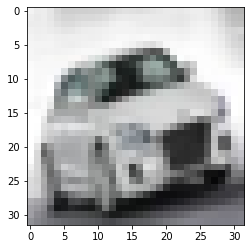

In [72]:
i = np.random.randint(low=0, high=10000)
plt.imshow(valid_dataloader.dataset.data[i], cmap='gray')

In [73]:
def testModel(index=0):
    image = valid_dataloader.dataset.data[index]
    plt.imshow(image, cmap='gray')
    with torch.no_grad():
        model.eval()
        image = image.view(1, 3, 32, 32).to(torch.FloatTensor())
        y_pred = model(image.to(device))
        _, predicted = torch.max(y_pred, 1)
    print(f"Predicted value: {classes[predicted[0]]}\n\n")

TypeError: ignored

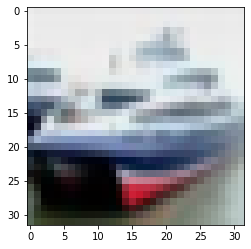

In [74]:
index = np.random.randint(low=0, high=10000)
testModel(1)